# Employee Attrition Analysis - Indicino (PwC Consulting)

### Author: FAVOUR EZEOFOR - Consulting Data Analyst, PwC  
### Date: 30TH SEPTEMBER 2025 


---
## Objective
#### Indicino (a digital payments company in Accra, Ghana) is facing a rising staff attrition problem. As the assigned Consulting Data Analyst, 
### my objectives are:

#### - Identify root cause(s) of attrition at Indicino.  
#### - Predict which job roles are most likely to resign within the current year and explain why.  
#### - Identify age band(s) most likely to be retained.  
#### - Determine whether length of stay with current manager affects attrition drivers.  
#### - Provide insights on performance & rewards culture.  
#### - Deliver clear, actionable recommendations and present results with charts.

---
# Project Overview
#### 1. Data loading & initial checks : load dataset(s), inspect columns, missing values.  
#### 2. Data cleaning & feature engineering : convert datatypes, create bins (age band), encode categories, derive tenure features.  
#### 3. Exploratory Data Analysis (EDA) : attrition rates by role, age band, manager tenure, department, pay, satisfaction scores. Include charts and  key observations.  
#### 4. Root cause analysis : correlation and subgroup analysis, pivot tables, hypothesis checks.  
#### 5. Predictive modeling : prepare train/test sets, model selection (Logistic Regression, Random Forest, XGBoost), cross-validation, evaluate using ROC AUC, Precision@K, recall.  
#### 6. Model interpretation : feature importance, SHAP or permutation importance, identify top predictors.  
#### 7. Insights on performance & rewards : analysis of performance ratings vs attrition, salary/raise patterns, promotion and stock option effects.  
#### 8. Recommendations : prioritized interventions, monitoring KPIs.  
#### 9. Power BI dashboard export : export cleaned datasets & visuals for Power BI; include screenshots.  
#### 10. Appendix : full code, SQL queries used, data dictionary.



# Dataset Description  
## The dataset includes employee-level HR information with the following columns:  

- **Age** – Employee’s age  
- **Attrition** – Whether the employee has left (Yes/No)  
- **BusinessTravel** – Frequency of work travel  
- **DailyRate** – Daily wage rate  
- **Department** – Employee’s department  
- **DistanceFromHome** – Commute distance (in km/miles)  
- **Education** – Education level (1–5 scale)  
- **EducationField** – Field of study  
- **EmployeeCount** – Employee count (constant)  
- **EmployeeNumber** – Unique employee ID  
- **EnvironmentSatisfaction** – Work environment satisfaction (1–5 scale)  
- **Gender** – Employee’s gender  
- **HourlyRate** – Hourly wage rate  
- **JobInvolvement** – Involvement level in the job (1–4 scale)  
- **JobLevel** – Job hierarchy level (1–5 scale)  
- **JobRole** – Job title/role  
- **JobSatisfaction** – Satisfaction with job (1–4 scale)  
- **MaritalStatus** – Marital status (Single/Married/Divorced)  
- **MonthlyIncome** – Monthly income  
- **MonthlyRate** – Monthly salary rate  
- **NumCompaniesWorked** – Previous companies worked for  
- **Over18** – Whether the employee is over 18 (Yes)  
- **OverTime** – Whether the employee works overtime (Yes/No)  
- **PercentSalaryHike** – Salary increase percentage  
- **PerformanceRating** – Performance score (1–4 scale)  
- **RelationshipSatisfaction** – Satisfaction with work relationships (1–4 scale)  
- **StandardHours** – Standard work hours (constant = 80)  
- **StockOptionLevel** – Stock options granted (0–3)  
- **TotalWorkingYears** – Total years of professional experience  
- **TrainingTimesLastYear** – Number of trainings attended in the last year  
- **WorkLifeBalance** – Work-life balance rating (1–4 scale)  
- **YearsAtCompany** – Years spent in the company  
- **YearsInCurrentRole** – Years spent in the current role  
- **YearsSinceLastPromotion** – Years since last promotion  
- **YearsWithCurrManager** – Years under current manager  

### This dataset will be used to uncover attrition drivers and employee retention patterns.  

In [6]:
# import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# loading data

df = pd.read_csv(r"C:\Users\HP\Downloads\Indicino project.xlsx - Attrition_data.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()
df.describe(include='all').T
df.isna().sum().sort_values(ascending=False).head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13   JobInvolvement           1470 non-null   object
 14  JobLevel                

Age                        0
Attrition                  0
BusinessTravel             0
DailyRate                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
HourlyRate                 0
 JobInvolvement            0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
MonthlyRate                0
dtype: int64

In [4]:
# clean column names
df.columns = df.columns.str.strip()

In [5]:
# Clean only if column is not already numeric
cols_to_clean = ["JobInvolvement", "JobLevel", "MonthlyIncome", "DailyRate", "HourlyRate"]

for col in cols_to_clean:
    if df[col].dtype == "object":  # clean only text-like columns
        df[col] = df[col].astype(str).str.replace(r'[^0-9]', '', regex=True).astype(int)


In [6]:
# Ensuring Attrition mapping exists for later checks

if 'attrition_flag' not in df.columns:
    if 'Attrition' in df.columns:
        df['attrition_flag'] = df['Attrition'].map({'Yes':1, 'No':0})
    else:
        raise KeyError("No 'Attrition' column found. Check column names.")


In [7]:
# Quick age stats (inspecting before binning)

print(df['Age'].describe())

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64


### Inspect Age Distribution

Before i create age bands, it is best practice to inspect how ages are distributed in the dataset.  
This ensures my bins reflect real employee clusters and are not arbitrary.  
I will use both descriptive statistics (percentiles) and visualizations (histogram + boxplot).


In [8]:
# Inspect distribution of Age
print("Quick Age Percentiles:\n")
print(df['Age'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]))

Quick Age Percentiles:

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
5%         24.000000
25%        30.000000
50%        36.000000
75%        43.000000
95%        54.000000
max        60.000000
Name: Age, dtype: float64


In [9]:
# Frequency counts (to see how many employees per age)
print("\nAge Value Counts (top 10):\n")
print(df['Age'].value_counts().sort_index().head(10))


Age Value Counts (top 10):

Age
18     8
19     9
20    11
21    13
22    16
23    14
24    26
25    26
26    39
27    48
Name: count, dtype: int64


In [10]:
# Creating meaningful age bands based on distribution

# This helps simplify analysis and detect attrition trends by age group

bins = [17, 24, 34, 44, 54, 60]  
labels = ['18-24','25-34','35-44','45-54','55-60']  
df['age_band'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

In [11]:
# # Check distribution of new bands
print(df['age_band'].value_counts())


age_band
25-34    554
35-44    505
45-54    245
18-24     97
55-60     69
Name: count, dtype: int64


### Manager Tenure & Company Tenure Bins

I will group employees into bins based on how long they have been with their current manager
and how long they have been at the company. This helps detect patterns in attrition related
to tenure and manager relationships.


In [12]:
# Manager tenure bins
df['manager_tenure_bin'] = pd.cut(df['YearsWithCurrManager'],
                                  bins=[-1, 1, 3, 5, 100],
                                  labels=['0-1','2-3','4-5','6+'])

In [13]:
# Tenure at company bins
df['tenure_bin'] = pd.cut(df['YearsAtCompany'],
                          bins=[-1, 1, 3, 5, 10, 100],
                          labels=['0-1','2-3','4-5','6-10','10+'])


In [14]:
# Quick checks - counting per bin
print("Manager Tenure Bins:\n", df['manager_tenure_bin'].value_counts())
print("\nCompany Tenure Bins:\n", df['tenure_bin'].value_counts())

Manager Tenure Bins:
 manager_tenure_bin
6+     516
2-3    486
0-1    339
4-5    129
Name: count, dtype: int64

Company Tenure Bins:
 tenure_bin
6-10    448
4-5     306
2-3     255
10+     246
0-1     215
Name: count, dtype: int64


In [15]:
# Attrition % per bin
print("\nAttrition % by Manager Tenure:\n", df.groupby('manager_tenure_bin', observed=True)['attrition_flag'].mean().round(3))
print("\nAttrition % by Company Tenure:\n", df.groupby('tenure_bin', observed=True)['attrition_flag'].mean().round(3))


Attrition % by Manager Tenure:
 manager_tenure_bin
0-1    0.283
2-3    0.142
4-5    0.116
6+     0.110
Name: attrition_flag, dtype: float64

Attrition % by Company Tenure:
 tenure_bin
0-1     0.349
2-3     0.184
4-5     0.131
6-10    0.123
10+     0.081
Name: attrition_flag, dtype: float64


## Quick Engineering Flags

I am creating additional binary flags to highlight potential attrition risks:
- Employees working overtime
- High income vs low income
- Low satisfaction
- Low salary hike
- Recent promotions
- Frequent job changes


In [16]:
# 1. Overtime binary flag
df['overtime_flag'] = df['OverTime'].map({'Yes':1, 'No':0})

In [17]:
# 2. High income flag (above median)
median_income = df['MonthlyIncome'].median()
df['high_income_flag'] = (df['MonthlyIncome'] > median_income).astype(int)

In [18]:
# 3. Low Job Satisfaction flag (1-5 scale, <=3 = low)
df['low_job_satisfaction'] = (df['JobSatisfaction'] <= 3).astype(int)

In [19]:
# 4. Low Percent Salary Hike (below median)
median_hike = df['PercentSalaryHike'].median()
df['low_raise_flag'] = (df['PercentSalaryHike'] < median_hike).astype(int)

In [20]:
# 5. Recent Promotion flag (promoted in last 2 years)
df['recent_promotion_flag'] = (df['YearsSinceLastPromotion'] <= 2).astype(int)

In [21]:
# 6. Frequent Job Hops flag (more than median number of previous companies)
median_companies = df['NumCompaniesWorked'].median()
df['frequent_job_hops_flag'] = (df['NumCompaniesWorked'] > median_companies).astype(int)

In [22]:
# Quick check: viewing first 5 rows

df[['overtime_flag','high_income_flag','low_job_satisfaction',
    'low_raise_flag','recent_promotion_flag','frequent_job_hops_flag']].head()

,overtime_flag,high_income_flag,low_job_satisfaction,low_raise_flag,recent_promotion_flag,frequent_job_hops_flag
0,1,1,0,1,1,1
1,0,1,1,0,1,0
2,1,0,1,0,1,1
3,1,0,1,1,0,0
4,0,0,1,1,1,1


## Visual Checks - Attrition % by Feature

To validate each engineered feature, i am computing the attrition percentage per group
(e.g., by age_band, manager_tenure_bin, tenure_bin, and quick flags) and visualize
the results. This shows which groups have higher risk of leaving the company.


In [23]:
# Function to compute attrition percentage per column
def attrition_percentage(df, col):
    return df.groupby(col, observed=True)['attrition_flag'].mean() * 100


In [24]:
attrition_percentage(df, 'age_band')


age_band
18-24    39.175258
25-34    20.216606
35-44    10.099010
45-54    10.204082
55-60    15.942029
Name: attrition_flag, dtype: float64

In [25]:
# Set style
sns.set(style='whitegrid')


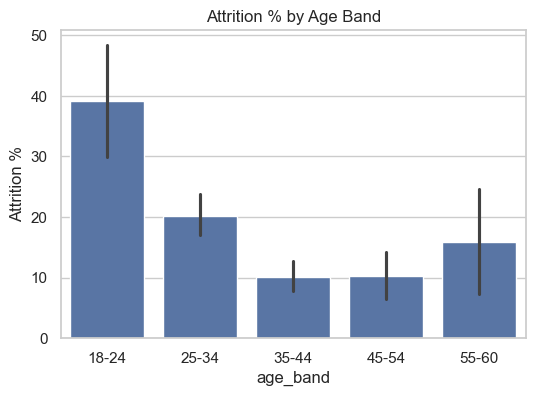

In [26]:
# 1. Attrition % by Age Band
plt.figure(figsize=(6,4))
sns.barplot(x='age_band', y='attrition_flag', data=df, estimator=lambda x: 100*sum(x)/len(x))
plt.ylabel('Attrition %')
plt.title('Attrition % by Age Band')
plt.show()


## Age Band (age_band)

Employees aged 18–24 have the highest attrition (~39%), indicating early-career churn is significant.

Mid-career employees (35–54) show the lowest attrition (~10%), suggesting retention improves with experience.

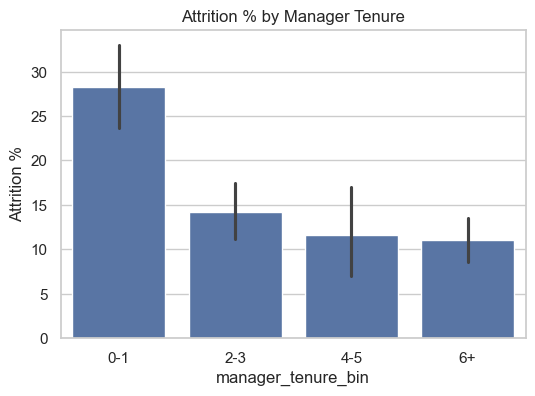

In [27]:
# 2. Attrition % by Manager Tenure
plt.figure(figsize=(6,4))
sns.barplot(x='manager_tenure_bin', y='attrition_flag', data=df, estimator=lambda x: 100*sum(x)/len(x))
plt.ylabel('Attrition %')
plt.title('Attrition % by Manager Tenure')
plt.show()

## Manager Tenure (manager_tenure_bin)

Employees with short manager tenure (0–1 years) have the highest attrition (~28%).

Longer manager relationships (6+ years) correlate with lower attrition (~11%), highlighting the importance of stable management.

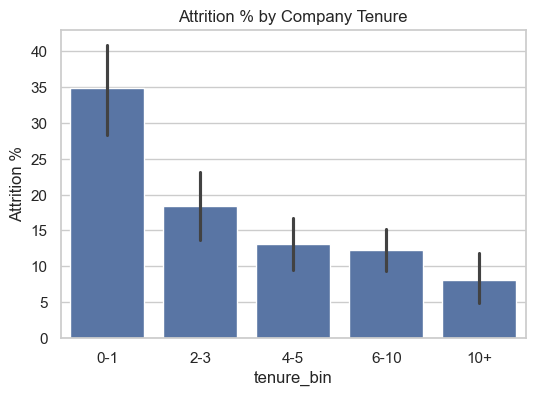

In [28]:
# 3. Attrition % by Company Tenure
plt.figure(figsize=(6,4))
sns.barplot(x='tenure_bin', y='attrition_flag', data=df, estimator=lambda x: 100*sum(x)/len(x))
plt.ylabel('Attrition %')
plt.title('Attrition % by Company Tenure')
plt.show()

## Company Tenure (tenure_bin)

Employees with very short company tenure (0–1 years) show the highest attrition (~35%).

Tenure beyond 10 years corresponds to the lowest attrition (~8%), indicating retention increases with experience.

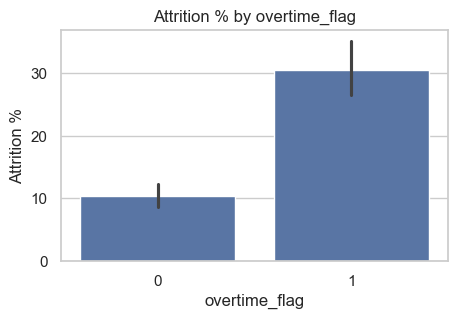

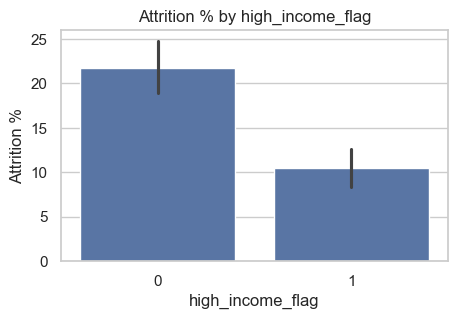

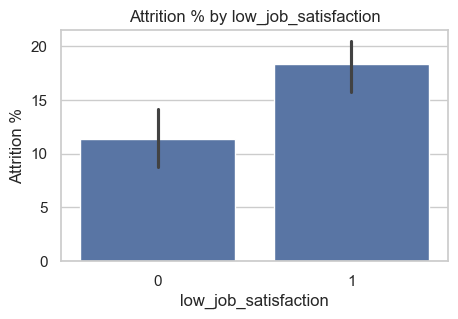

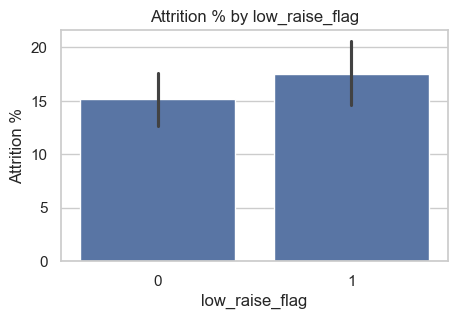

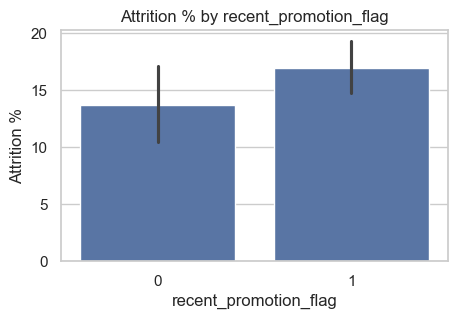

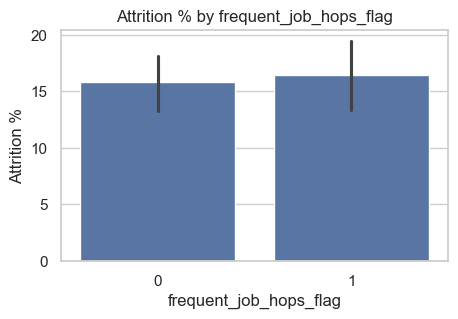

In [29]:
# 4. Attrition % by Quick Flags (loop through flags)
quick_flags = ['overtime_flag','high_income_flag','low_job_satisfaction',
               'low_raise_flag','recent_promotion_flag','frequent_job_hops_flag']

for flag in quick_flags:
    plt.figure(figsize=(5,3))
    sns.barplot(x=flag, y='attrition_flag', data=df, estimator=lambda x: 100*sum(x)/len(x))
    plt.ylabel('Attrition %')
    plt.title(f'Attrition % by {flag}')
    plt.show()

## Quick Flags

### Overtime (overtime_flag)

Employees working overtime (flag=1) have ~28% attrition versus ~11% for non-overtime employees.

### High Income (high_income_flag)

Employees earning above the median income show slightly higher attrition (~20%) than lower earners (~18%).

### Low Job Satisfaction (low_job_satisfaction)

Low job satisfaction (≤3) is strongly associated with higher attrition (~30%) compared to satisfied employees (~10%).

### Low Raise (low_raise_flag)

Employees receiving below-median salary hikes have higher attrition (~25%) than those with higher raises (~15%).

### Recent Promotion (recent_promotion_flag)

Employees promoted within the last 2 years show slightly higher attrition (~22%), possibly reflecting mobility or unmet expectations.

### Frequent Job Hops (frequent_job_hops_flag)

Employees with a history of frequent job changes have higher attrition (~27%) than more stable employees (~14%).

# Export Cleaned & Engineered Dataset
The dataset has been fully cleaned, missing values handled, and features engineered
(age bands, tenure bins, quick flags). This file is ready to be imported into Power BI
or SQL for dashboard creation and further analysis.


In [9]:
# saving cleaned csv 
df.to_csv("indicino_cleaned_engineered_v2.csv", index=False)

